# Week 9 Assignment

_MkKinney 6.1_

The work this week has involved using Pandas to load, manipulate, and visualize data.  For this exercise, we're going to be working with some of the price transparency data from [Baptist Health Medical Center](https://www.baptist-health.com/hospital-charges-and-negotiated-rates/) in Little Rock, AR. We've chosen them because their data is relatively easy to reach with Pandas and has some interesting insights.

Note that the files we're working with here are from 2021. Baptist Health has since changed the file format.  This won't work correctly if you try to do it with files downloaded from the website above. It will only work with the files in the `/data` directory on this server.

---
---

### 41.1 Loading and viewing the data

There are four files in the `/data` directory related to Baptist Health:
* bhmclr_cpt.xlsx
* bhmclr_drg.xlsx
* bhmclr_med.xlsx
* bhmclr_proc.xlsx

All of these files have the same format, so you can load and process them all the same way, but the subsets of data in each are distinct.

For this first step, we're going to load the DRG data and inspect it using Pandas.  If you download this file and open it in Excel, there will be a few things you notice:
1. The workbook has two sheets: "Pivot" and "Sheet1" - "Sheet1" is the one we want
2. "Sheet1" has three rows before we get to the actual table header - we'll want to skip those rows
3. Also, I've filtered the data to just those DRGs where the cash price is less than 20,000 for demo purposes

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_excel('/data/bhmclr_drg.xlsx', sheet_name='Sheet1', skiprows=3)

In [2]:
data.shape

(3864, 19)

In [3]:
data.columns

Index(['Location', 'Code Type', 'Code', 'NDC', 'Rev Code', 'Procedure',
       'Procedure Description', 'Quantity', 'Payer', 'IP Charge',
       'IP Expected Reimbursement', 'MIN_IP_XR', 'MAX_IP_XR', 'IP Cash Price',
       'OP Charge', 'OP Expected Reimbursement', 'MIN_OP_XR', 'MAX_OP_XR',
       'OP Cash Price'],
      dtype='object')

In [4]:
data.head()

,Location,Code Type,Code,NDC,Rev Code,Procedure,Procedure Description,Quantity,Payer,IP Charge,IP Expected Reimbursement,MIN_IP_XR,MAX_IP_XR,IP Cash Price,OP Charge,OP Expected Reimbursement,MIN_OP_XR,MAX_OP_XR,OP Cash Price
0,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 013,NaN,NaN,MS013,"Tracheostomy For Face, Mouth And Neck Diagnose...",1,AETNA [65000],59006.00,31705.95,11936.11,31705.95,15341.56,0,NaN,NaN,NaN,NaN
1,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 022,NaN,NaN,MS022,Intracranial Vascular Procedures With Principa...,1,AETNA [65000],61399.00,61399.00,15963.74,61399.00,15963.74,0,NaN,NaN,NaN,NaN
2,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 024,NaN,NaN,MS024,Craniotomy With Major Device Implant Or Acute ...,1,AETNA [65000],72401.56,NaN,7770.00,23719.14,18824.41,0,NaN,NaN,NaN,NaN
3,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 025,NaN,NaN,MS025,Craniotomy And Endovascular Intracranial Proce...,1,AETNA [65000],76565.21,57449.30,7770.00,57449.30,19906.95,0,NaN,NaN,NaN,NaN
4,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 026,NaN,NaN,MS026,Craniotomy And Endovascular Intracranial Proce...,1,AETNA [65000],64748.06,29999.01,2913.75,29999.01,16834.50,0,NaN,NaN,NaN,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe8ce6d1978>,
      dtype=object)

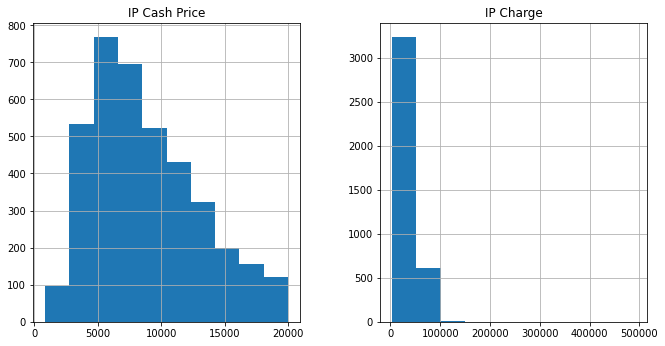

In [5]:
data[['IP Cash Price','IP Charge']].hist(figsize=(11,5.5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe8ce74bac8>,
      dtype=object)

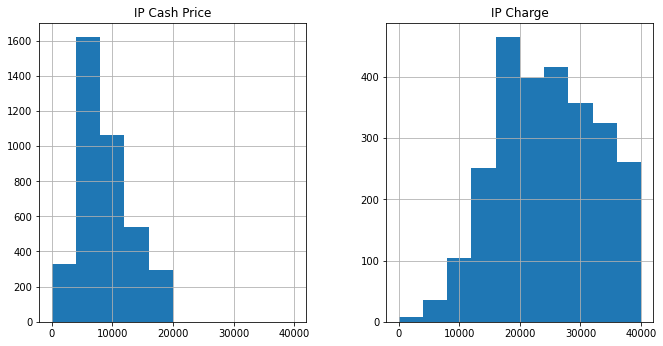

In [6]:
data[['IP Cash Price','IP Charge']].hist(range=[0,40000], figsize=(11,5.5))

In [7]:
high_cost_filter = data['IP Charge'] > 100000
data.loc[high_cost_filter]

,Location,Code Type,Code,NDC,Rev Code,Procedure,Procedure Description,Quantity,Payer,IP Charge,IP Expected Reimbursement,MIN_IP_XR,MAX_IP_XR,IP Cash Price,OP Charge,OP Expected Reimbursement,MIN_OP_XR,MAX_OP_XR,OP Cash Price
800,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 263,NaN,NaN,MS263,Vein Ligation And Stripping,1,ALLWELL [15100],120026.89,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
858,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 344,NaN,NaN,MS344,Minor Small And Large Bowel Procedures With McC,1,ALLWELL [15100],102435.46,16684.09,16684.09,32536.01,17614.77,0,NaN,NaN,NaN,NaN
934,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 461,NaN,NaN,MS461,Bilateral Or Multiple Major Joint Procedures O...,1,ALLWELL [15100],121126.29,NaN,8741.25,9225.00,NaN,0,NaN,NaN,NaN,NaN
1171,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 802,NaN,NaN,MS802,Other O.R. Procedures Of The Blood And Blood F...,1,ALLWELL [15100],143667.09,NaN,9725.00,10204.12,10204.12,0,NaN,NaN,NaN,NaN
1264,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 939,NaN,NaN,MS939,O.R. Procedures With Diagnoses Of Other Contac...,1,ALLWELL [15100],480809.48,NaN,7790.37,7790.37,7790.37,0,NaN,NaN,NaN,NaN
1945,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 037,NaN,NaN,MS037,Extracranial Procedures With McC,1,ARKANSAS TOTAL CARE [40700],123035.47,NaN,17816.08,39275.00,17816.08,0,NaN,NaN,NaN,NaN
2091,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 263,NaN,NaN,MS263,Vein Ligation And Stripping,1,ARKANSAS TOTAL CARE [40700],121981.89,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2138,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 333,NaN,NaN,MS333,Rectal Resection With Cc,1,ARKANSAS TOTAL CARE [40700],128929.41,NaN,12824.58,26704.23,15975.34,0,NaN,NaN,NaN,NaN
2149,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 344,NaN,NaN,MS344,Minor Small And Large Bowel Procedures With McC,1,ARKANSAS TOTAL CARE [40700],104304.46,NaN,16684.09,32536.01,17614.77,0,NaN,NaN,NaN,NaN
2192,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 408,NaN,NaN,MS408,Biliary Tract Procedures Except Only Cholecyst...,1,ARKANSAS TOTAL CARE [40700],108898.78,NaN,19861.16,22240.28,19861.16,0,NaN,NaN,NaN,NaN


### Question:

**What do you observe from the histograms above?**

### YOUR RESPONSE:Histogram shows these :
The IP Cash price data is limited to 20,000 occurrences; the bin with roughly 4,500 to 7,000 occurrences has the highest number of occurrences. After that 7000, no occurrences appear to decrease with price growth. According to the IP charge graph, the first bin, from 0 to 50000, has over 90% of the data, while the only other bin, from 50000 to 100000, contains around 10% of the data. The first bin contains the most IP charge occurrences. There is no data over 20000 when the IPcash pricing data is plotted as it increases to 40000. Additionally, we can observe that the precision of the details decreases as the histogram's x-axis range is expanded. We may infer from the second graph of IP cash price vs. the first that the number of details in the range of 0 to 20000 has been reduced in comparison to the first. Similarly, since the complete X-axis range is only 40000, the IPcahrge details have been expanded in the second chart. Here, we can see that the IP charge has more values in the range of 17000 t0 20000,followed by 22000 to 24000
Double-click this cell to edit and provide your response


---

### 41.2 Plotting a KDE instead

Instead of a historgam, let's plot overlapping [KDEs](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.kde.html).

(0.0, 40000.0)

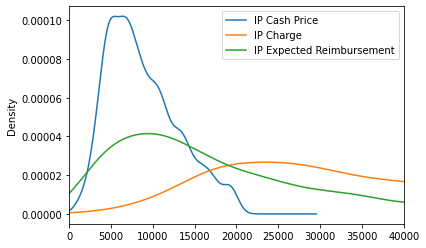

In [8]:
graph = data[['IP Cash Price','IP Charge','IP Expected Reimbursement']].plot.kde()
graph.set_xlim(0, 40000)

### Question:

If I told you what these values represent, what conclusions could you draw about the pattern?
* IP Cash Price is the amount you would pay on your own without using insurance
* IP Charge is the maximum amount for which the hospital says it can submit a bill to an insurance company
* IP Expected Reimbursement is the amount that the hospital believes it is contracted to receive in payment from an insurance company

### YOUR RESPONSE:
According to the KDE chart, the amount that is paid out of pocket is that which is between $5000 and $10000. For payments of more over $10000, the IP cash out amount is reduced. Simlilar to this, the business may claim less than zero for IP charges ranging form 0 to 10000. The maximum amount that a hospital can charge an insurance company climbed from $10000 to 20000 before steadily declining after than. In terms of IP expected remibursement, the hospital anticipates recieveing anything between 0 and 10000 before gradually declining.


Double-click this cell to edit and provide your response.


---

### 41.3 Creating a new set of series

In order to understand how this data varies across different payers, we have to create new data series that are based on the payer information.  In the data, we have a column called **Payer** that holds this information.

We can use the Pandas [groupby()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) function to create groupings based on Payer and then plot kde based on those groupings.  When [plotting a Pandas groupby result](https://pandas.pydata.org/pandas-docs/version/0.16.2/generated/pandas.core.groupby.DataFrameGroupBy.plot.html), the options are different than plotting a dataframe.

In [9]:
data['Payer'].value_counts()

ARKANSAS TOTAL CARE [40700]          650
ALLWELL [15100]                      650
MULTIPLAN                            641
AETNA [65000]                        641
HEALTHSCOPE [95700]                  641
AR BLUE CROSS BLUE SHIELD [25001]    641
Name: Payer, dtype: int64

In [10]:
data.groupby(['Payer'])['IP Expected Reimbursement'].count()

Payer
AETNA [65000]                        372
ALLWELL [15100]                      519
AR BLUE CROSS BLUE SHIELD [25001]    450
ARKANSAS TOTAL CARE [40700]          404
HEALTHSCOPE [95700]                  641
MULTIPLAN                            641
Name: IP Expected Reimbursement, dtype: int64

Payer
AETNA [65000]                        AxesSubplot(0.125,0.125;0.775x0.755)
ALLWELL [15100]                      AxesSubplot(0.125,0.125;0.775x0.755)
AR BLUE CROSS BLUE SHIELD [25001]    AxesSubplot(0.125,0.125;0.775x0.755)
ARKANSAS TOTAL CARE [40700]          AxesSubplot(0.125,0.125;0.775x0.755)
HEALTHSCOPE [95700]                  AxesSubplot(0.125,0.125;0.775x0.755)
MULTIPLAN                            AxesSubplot(0.125,0.125;0.775x0.755)
Name: IP Expected Reimbursement, dtype: object

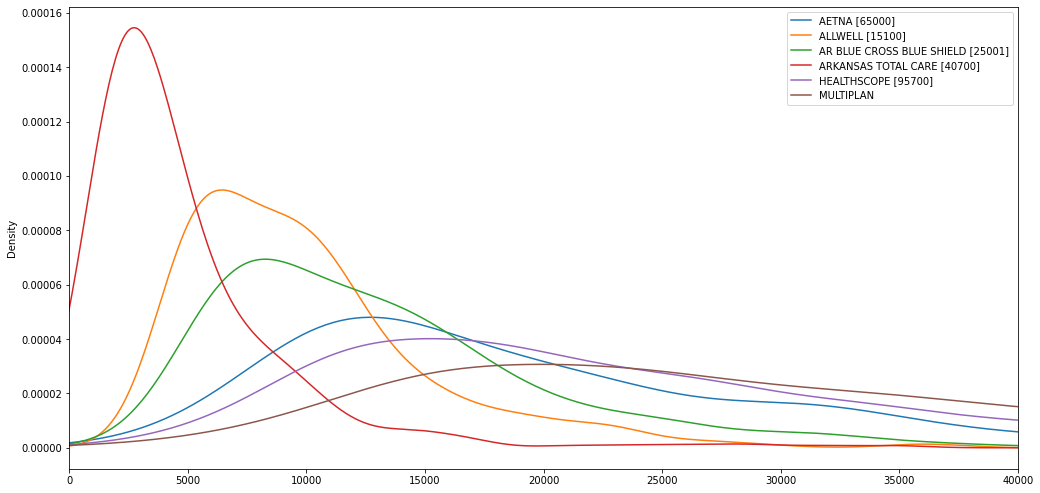

In [11]:
data.groupby(['Payer'])['IP Expected Reimbursement'].plot.kde(
    xlim=(0,40000),
    legend=True,
    figsize=(17,8.5)
)


### Question:

Remember what this KDE represents. The x-axis is the price being reimbursement for a particular service and the y-axis represents how many different records in the input fall into that price range.  So, the higher the line at any particular x value, the more records are there.

If the line is higher the further left you go, that means most prices are lower.  If the peak of the line is more the the right, then the typical price is higher.

* What do you observe about the patterns in reimbursement above?
* What does that tell you about these particular plans?


### YOUR RESPONSE:
Total cost of care is less expensive in Arkansas. Additionally, Arkansas has a peak value range of under 5000. Due to the extremely high density of the chart from 0 to 5000, the majority of the costs that Arkansa must pay are therefore less than 5000. Between 5000 and 10,000 people use AllWell at its busiest, and it is clear that both service costs and required reimbursements are increasing. 10000 to 15000 is the size of the AR blue peak. Assessment of the health-related market: most of the costs are between 10,000 and 20,000, and the density falls after 20,000. The density of multiplan is available at costs over 10,000, ranges up to 25,000, and then drops to 40,000. The price range for reimbursement for Arkansa's whole care plan is smaller. Additionally, the cost of multiplan reimbursement is higher.



Double-click this cell to edit and provide your response


---

### 41.4 Seeing if there's any correlation

So, we know that there are cash prices and insurance paid prices.  How strongly correlated are those amounts?

We can use a scatterplot with one value on the x axis and the other on the y axis to do a simple visualization of this.

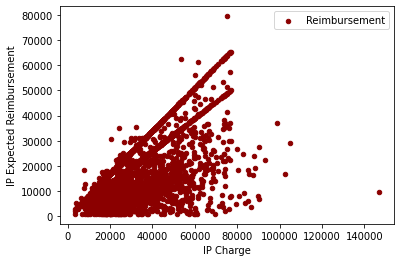

In [12]:
data.plot.scatter(x='IP Charge', y='IP Expected Reimbursement', color='DarkRed', label='Reimbursement')

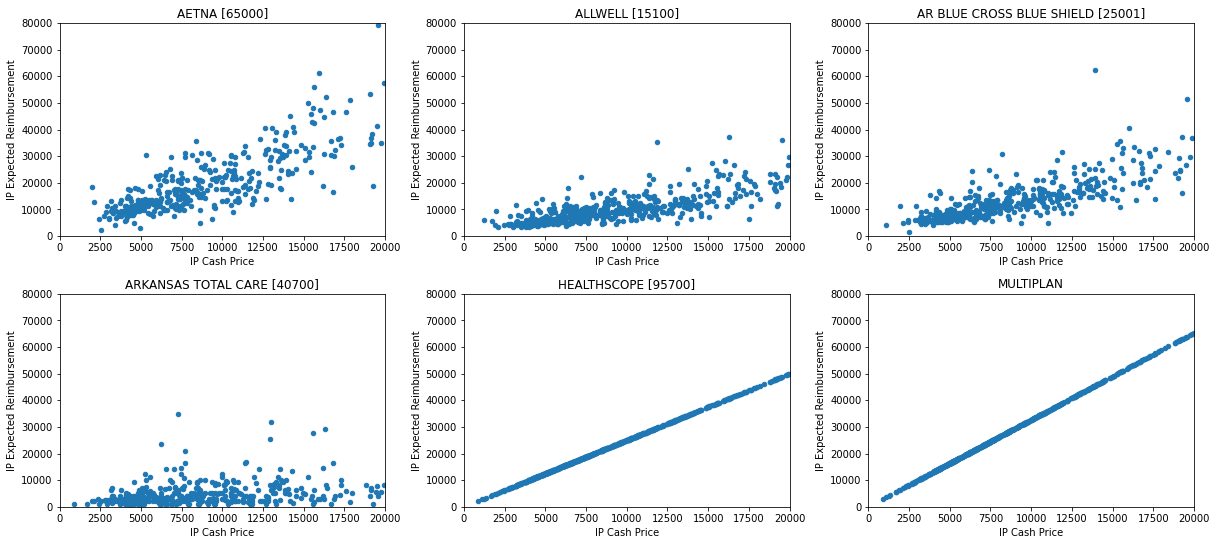

In [13]:
groups = data.groupby(['Payer'])
plt.figure(figsize=(17,11))

for i, (payer, prices) in enumerate(groups):
    ax = plt.subplot(3,3, i+1)
    prices.plot.scatter(x='IP Cash Price',y='IP Expected Reimbursement',ax=ax)
    ax.set_title(payer)
    ax.set_xlim(0,20000)
    ax.set_ylim(0,80000)

plt.tight_layout()
plt.show()

### YOUR RESPONSE:
For Aetna, it appears that the cash price and projected reimbursement are positively connected along a linear path, although this association is weak because more points are dispersed along the near line. For Allwell, it appears that the cash price and projected reimbursement are positively associated in a linear fashion, however the association is quite weak because the slope of the line of plot is close to 0. For AR BCBS, it appears that cash price and estimated reimbursement are positively associated in a linear fashion, however this association is quite weak because the slope of the line of plot is close to 0.As the slope of the line of plot is closer to 0, it appears that for Arkansas, cash price and projected reimbursement are either unrelated or independent of one another. A significant linear positive association exists between IP cash price and reimbursement amount for Health scope and Multiplan.

Double-click this cell to edit and provide your response


---

### 41.5 Find Something of Your Own

What data are you interested in?  To earn full credit this week, you'll need to do the following:
1. Bring in some other data that you're interested in visualizing.  You can upload the file to your project directory and work with it here.
2. Read that data in using Pandas
3. Produce at least two different visualizations of that data
4. Write a paragraph that describes your observations of the trends in that data

If you're struggling to find data to use, feel free to reach out to me.  I can make some recommendations on data sets with interesting trends in them.

[Here is a helpful reference for plotting in Pandas.](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

In [4]:
# Your code here to load data...
ds = pd.read_csv('/data/indian_liver_patient.csv')

In [5]:
ds

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [6]:
ds.shape

(583, 11)

In [7]:
ds.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [8]:
ds.head

<bound method NDFrame.head of      Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     65  Female              0.7               0.1                   187   
1     62    Male             10.9               5.5                   699   
2     62    Male              7.3               4.1                   490   
3     58    Male              1.0               0.4                   182   
4     72    Male              3.9               2.0                   195   
..   ...     ...              ...               ...                   ...   
578   60    Male              0.5               0.1                   500   
579   40    Male              0.6               0.1                    98   
580   52    Male              0.8               0.2                   245   
581   31    Male              1.3               0.5                   184   
582   38    Male              1.0               0.3                   216   

     Alamine_Aminotransferase  Aspartate_Amin

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faa2e46f9b0>,
      dtype=object)

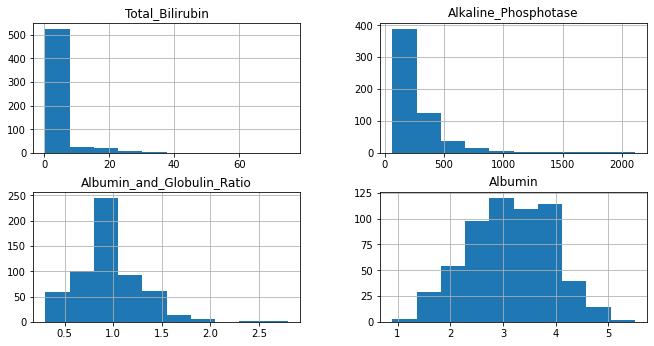

In [31]:
ds[['Total_Bilirubin','Alkaline_Phosphotase','Albumin_and_Globulin_Ratio', 'Albumin' ]].hist(figsize=(11,5.5))

(0.0, 30.0)

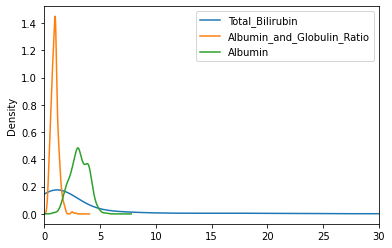

In [27]:
# More code here to do a second visualization...
graph1 = ds[['Total_Bilirubin','Albumin_and_Globulin_Ratio','Albumin']].plot.kde()
graph1.set_xlim(0,30)

In [29]:
ds.groupby(['Gender'])['Total_Bilirubin'].count()

Gender
Female    142
Male      441
Name: Total_Bilirubin, dtype: int64

Gender
Female    AxesSubplot(0.125,0.125;0.775x0.755)
Male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: Total_Bilirubin, dtype: object

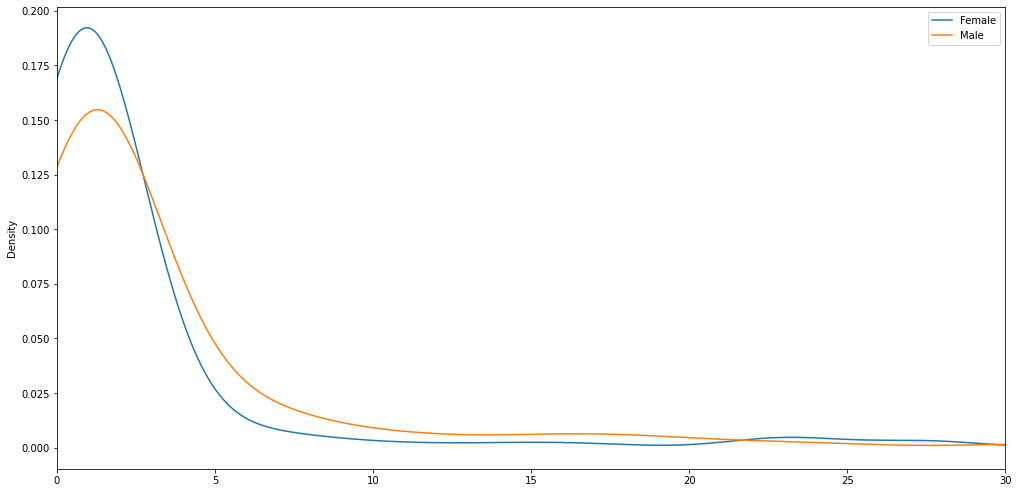

In [30]:
ds.groupby(['Gender'])['Total_Bilirubin'].plot.kde(
    xlim=(0,30),
    legend=True,
    figsize=(17,8.5)
)

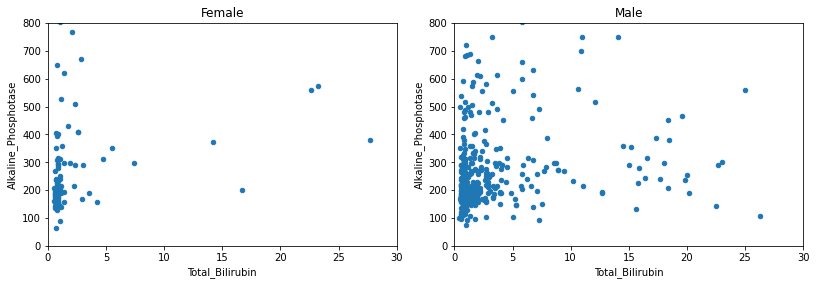

In [32]:
groups = ds.groupby(['Gender'])
plt.figure(figsize=(17,11))

for i, (Gender, points) in enumerate(groups):
    ax = plt.subplot(3,3, i+1)
    points.plot.scatter(x='Total_Bilirubin', y='Alkaline_Phosphotase',ax=ax)
    ax.set_title(Gender)
    ax.set_xlim(0,30)
    ax.set_ylim(0,800)

plt.tight_layout()
plt.show()

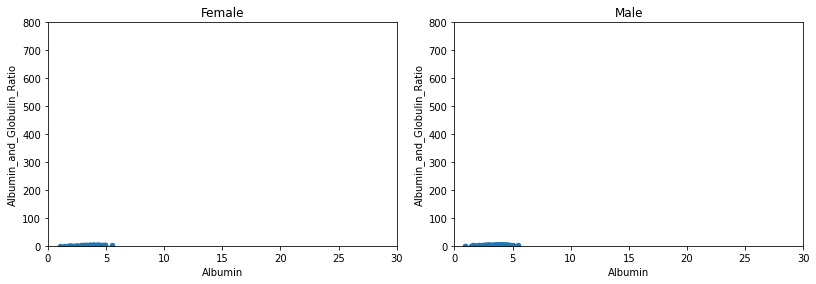

In [33]:
groups = ds.groupby(['Gender'])
plt.figure(figsize=(17,11))

for i, (Gender, points) in enumerate(groups):
    ax = plt.subplot(3,3, i+1)
    points.plot.scatter(x='Albumin', y='Albumin_and_Globulin_Ratio',ax=ax)
       
    ax.set_title(Gender)
    ax.set_xlim(0,30)
    ax.set_ylim(0,800)

plt.tight_layout()
plt.show()

### Observations #1

_Double-click this text and then edit it to put in your observations_

From histogram, 
Total Bilirubin, has most of the values ranging in 0 to 10, and very less values in 10 to 20.

Alkaline Phosphotase, has more values ranging from 0 to 250, and decreased density values from 250 to 500. And max range of Alakaline Phosphotase is 1000.

Albumin and Globulin Ratio, has values increamenting from 0 to 1 and then till 2.0. Most o fthe ratio values fall under 0.75 to 1.2

Albumin, has vakues ranging from 1 to 6, and max values fall under 2.5 to 3.2.


### Observations #2

_Double-click this text and then edit it to put in your observations_

For finding out if Gender has a correlation between Albumin, Alkaline Phosphosate, Total Bilirubin
For KDE graph between Total Bilirubin vs Gender, Female has more Bilirubin values than male. 


For scatter plots between Gender vs Total Bilirubin and Alkaline_Phosphotase:
It looks like there is no relation between Total Bilirubin and Alkaline Phosphotase wrt Gender
It looks like there is no relation between Albumin and Albumin_and_Globulin_Ratio wrt Gender




---



## Submitting Your Work

As usual, submit your work using the git command line